In [716]:
import pandas 
import json 
import os
import numpy as np
import pandas as pd

In [717]:
def xuly(quotes):
    value={}
    for i in quotes:
        if(i=='quote'):continue
        value[i]=quotes[i]
    tmp= quotes['quote']
    for j in tmp:
        value[j]=tmp[j]
    return value
def xuly_data(listquotes):
    value=[]
    for i in listquotes:
        value.append(xuly(i))
    return value
        
        

In [718]:
def get_address_data(path_to_year):
    #path_to_year='./data/historical-data'
    list_path_to_year=[path_to_year+'/'+path+'/'+'coin-id-1' for path in os.listdir(path_to_year)]
    list_path=[]
    for i in list_path_to_year:
        for path in os.listdir(i):
            if path.endswith('.json'):
                list_path.append(i+'/'+path)
    return list_path
def getQuotes(path_to_year):
    data_coin_history_by_id=[]
    list_path=get_address_data(path_to_year)
    for i in list_path:
        data_tmp=json.load(open(i,'r'))
        if(len(data_tmp['quotes'])!=0):data_coin_history_by_id+=(data_tmp['quotes'])
    return data_coin_history_by_id
def xyly_ngay_gio_to_gio(object):
    tmp=object.split('T')[1]
    return tmp[0:8]
def xyly_ngay_gio_to_ngay(object):
    tmp=object.split('T')[0]
    return tmp
#xuly_data(data_coin_history_by_id)
def getData(path_to_year):
    data_coin_history_by_id=getQuotes(path_to_year)
    data_=pandas.DataFrame(xuly_data(data_coin_history_by_id))
    for i in data_.keys():
        data_=data_[data_[i]!=0]

    del data_['timeOpen']
    del data_['timeClose']
    data_['date']=''
    data_["timeHigh"] = data_["timeHigh"].apply(xyly_ngay_gio_to_gio)
    data_["timeLow"] = data_["timeLow"].apply(xyly_ngay_gio_to_gio)
    data_["date"] = data_["timestamp"].apply(xyly_ngay_gio_to_ngay)
    del data_['timestamp']
    return data_
path1='./data/historical-data'
data_train=getData(path1)
path_2022="./bitcoin-2022-historical-data/bitcoin-2022-historical-data/"
data_2022=getData(path_2022)
data=[data_train,data_2022]
data=pd.concat(data)


In [719]:
data_train=data[data["date"]>='2015-01-01']
data_train=data_train[["open","close","volume","high","low"]]
l_volume=list(data_train["volume"])
l_volume.insert(0,0)
l_volume.pop()
data_train["bfvolume"]=l_volume

l_close=list(data_train["close"])
l_close.insert(0,0)
l_close.pop()
data_train["bfclose"]=l_close

l_high=list(data_train["high"])
l_high.insert(0,0)
l_high.pop()
data_train["bfhigh"]=l_high

l_low=list(data_train["low"])
l_low.insert(0,0)
l_low.pop()
data_train["bflow"]=l_low
data_train=data_train[data_train["bfvolume"]!=0]
data_train=data_train[['open',"close","bfvolume","bfclose","bfhigh","bflow"]]

In [720]:
from sklearn.preprocessing import MinMaxScaler    #to make all the numbers to the same scale
from sklearn.linear_model import LinearRegression   #for linear regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Split data training and testing
np.random.seed(0) #so data can have same values
df_train, df_test = train_test_split(data_train, train_size = 0.8, test_size = 0.2, random_state = 100)



In [721]:
#scaler = MinMaxScaler()
var_to_scale = ['open',	'close'	,'bfvolume',	'bfclose',	'bfhigh','bflow']
#df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])

df_train.head()



,open,close,bfvolume,bfclose,bfhigh,bflow
1922,7634.190000,7567.150000,4.797620e+09,7624.910000,7769.040000,7504.950000
2155,4022.713307,4035.826351,9.252936e+09,4023.968162,4053.906677,4021.542434
254,21770.148133,22370.448650,3.449395e+10,21769.256340,21770.553191,21406.944641
1780,9173.040039,9194.849609,6.457400e+09,9205.120117,9937.500000,8956.429688
1,47680.926625,47345.220564,2.458267e+10,47686.811509,47827.310995,46288.486095


In [722]:
df_train.describe()

,open,close,bfvolume,bfclose,bfhigh,bflow
count,2313.000000,2313.000000,2.313000e+03,2313.000000,2313.000000,2313.000000
mean,13342.958947,13338.517476,1.694873e+10,13340.567752,13670.975970,12958.753166
std,16308.083307,16288.526549,2.009846e+10,16303.133487,16715.229532,15830.295805
min,176.897003,178.102997,7.860650e+06,178.102997,211.731003,171.509995
25%,908.114990,907.937988,1.533510e+08,907.609985,919.325989,887.007996
50%,7398.633906,7379.950195,9.252936e+09,7397.796815,7537.950195,7233.399538
75%,18263.929255,18321.144916,2.862467e+10,18264.992107,18626.292652,17619.532389
max,67549.735581,67566.830088,3.509679e+11,67566.830088,68530.339686,66382.061008


In [723]:

y_train = df_train.pop('close') 
x_train = df_train


In [724]:
y_train.head()

1922     7567.150000
2155     4035.826351
254     22370.448650
1780     9194.849609
1       47345.220564
Name: close, dtype: float64

In [725]:
#using linear regression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [726]:
lm.coef_

array([-7.12837425e-02,  6.60729037e-10,  1.10013086e+00, -1.58806047e-02,
       -1.57571360e-02])

In [727]:
lm.score(x_train,y_train)

0.9974552487920492

In [728]:
#df_test[var_to_scale] = scaler.fit_transform(df_test[var_to_scale])

In [729]:
x_train.head()

,open,bfvolume,bfclose,bfhigh,bflow
1922,7634.190000,4.797620e+09,7624.910000,7769.040000,7504.950000
2155,4022.713307,9.252936e+09,4023.968162,4053.906677,4021.542434
254,21770.148133,3.449395e+10,21769.256340,21770.553191,21406.944641
1780,9173.040039,6.457400e+09,9205.120117,9937.500000,8956.429688
1,47680.926625,2.458267e+10,47686.811509,47827.310995,46288.486095


In [730]:
x_test.head()

,open,bfvolume,bfclose,bfhigh,bflow
2945,0.618389,0.698639,0.621750,0.616051,0.549282
2925,0.880474,0.414613,0.881753,0.841196,0.834223
833,0.000816,0.000379,0.000811,0.000851,0.000960
1224,0.005630,0.000549,0.005631,0.005164,0.005848
1367,0.010761,0.000499,0.010924,0.010306,0.011300


In [731]:
#Using model
y_test = df_test.pop('close')
x_test = df_test
predictions = lm.predict(x_test)

In [732]:
predictions

array([40827.52282472, 57719.96683744,   283.38361926,   597.43605756,
         942.56019506,  9522.99530368,  2606.06804411, 47904.93492007,
         252.18875193, 19556.07833826, 37294.72491975,  9225.03215246,
       19121.29398462, 23783.1661416 ,   251.38817114,   762.17137077,
         479.70490747,   609.85119395,   826.62726143,  3920.74940485,
       10389.04148618,   298.64742027, 40430.85450778,  1196.71227431,
         260.32534577, 19940.82796227,  9638.62736743,   459.98307122,
         439.44882689,  2450.47998829,   266.41847586,   767.13413787,
        3273.53197211,  2840.4315431 ,  6585.25365721,   248.93882875,
         555.7951468 ,   288.38596719,  3907.25376203, 48843.86926516,
         438.75458843, 19578.8620897 ,  8130.05320095, 19952.2561278 ,
       53683.88867438,   249.93561212,  6461.88423697,   260.14301733,
         722.44913282,  3925.45142145,  9387.07106672,  7028.46491987,
       46094.57274847,   650.67947856,  7570.93157343,  8765.74358731,
      

In [733]:
x_test

,open,bfvolume,bfclose,bfhigh,bflow
2945,40596.948323,8.828194e+10,40782.738262,42462.984986,35050.615825
2925,57714.664858,5.239593e+10,57750.177346,57900.719988,53129.600877
833,261.115997,5.853300e+07,260.997009,279.928009,260.709991
1224,575.554993,7.991080e+07,575.536987,575.643005,570.810974
1367,910.677002,7.358860e+07,921.012024,928.265991,916.737976
2284,9522.328955,1.379145e+10,9519.145914,9681.648008,9472.948337
1514,2591.260010,1.446840e+09,2589.600098,2662.850098,2549.030029
2847,47877.034375,8.138891e+10,47909.331195,48463.467125,44187.762351
730,228.968994,3.857400e+07,229.285995,233.304993,218.022995
262,19545.591275,4.017700e+10,19544.129250,19639.479733,18390.318710


In [734]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)
##0.9978656992392166 - Normal scale
##0.9974552487920492 - Min max scale
##0.9978443316073371 - Khong scale

0.9978443316073371

In [735]:
# R squared value
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
#accurancy, precision, recall - MSE - RMSE
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print("MSE: ",mse)
print("RMSE: ",rmse)
#Normal scale
# MSE:  0.0021343007607833395
# RMSE:  0.0461984930574942
#Min max scale
# MSE:  0.0001524621998012703
# RMSE:  0.012347558455065936

MSE:  602451.0025069407
RMSE:  776.1771721114585


In [736]:
#AttributeError: 'Series' object has no attribute 'flatten' --to avoid this error in the next step
y_test.shape
y_test_matrix = y_test.values.reshape(-1,1)

In [737]:
y_test_matrix

array([[37304.69067136],
       [57828.05063222],
       [  265.08300781],
       [  598.2119751 ],
       [  892.68701172],
       [ 9607.42368665],
       [ 2721.79003906],
       [47504.85118326],
       [  225.85499573],
       [18890.78909637],
       [35552.51714847],
       [ 8790.36800074],
       [19053.74024054],
       [23656.20702558],
       [  222.88200378],
       [  751.58502197],
       [  454.16299438],
       [  592.69000244],
       [  823.98400879],
       [ 3963.31374243],
       [10231.7438454 ],
       [  288.27801514],
       [39740.31985388],
       [ 1221.38000488],
       [  236.15299988],
       [19323.91485611],
       [ 9729.80223149],
       [  420.73599243],
       [  421.69000244],
       [ 2506.4699707 ],
       [  236.07200623],
       [  756.77398682],
       [ 3213.93994141],
       [ 2667.76000977],
       [ 6622.48      ],
       [  217.46400452],
       [  531.38598633],
       [  261.55099487],
       [ 3956.89386975],
       [51206.69295308],


In [738]:
#load actual and predecited values side by side
dframe=pd.DataFrame({'actual':y_test_matrix.flatten(),'Predicted':predictions.flatten()}) 
#flatten toget single axis of data (1 dimension only)

In [739]:
dframe.head()


,actual,Predicted
0,37304.690671,40827.522825
1,57828.050632,57719.966837
2,265.083008,283.383619
3,598.211975,597.436058
4,892.687012,942.560195


Text(0, 0.5, 'Predicted')

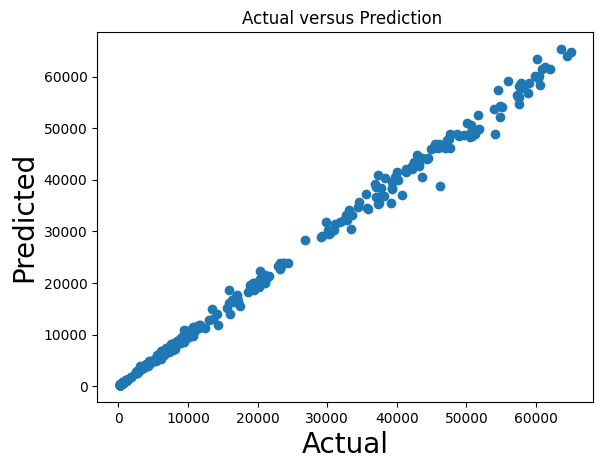

In [740]:
#using scatter plot compare the actual and predicted data
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
plt.scatter(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)   

In [741]:
predictions

array([40827.52282472, 57719.96683744,   283.38361926,   597.43605756,
         942.56019506,  9522.99530368,  2606.06804411, 47904.93492007,
         252.18875193, 19556.07833826, 37294.72491975,  9225.03215246,
       19121.29398462, 23783.1661416 ,   251.38817114,   762.17137077,
         479.70490747,   609.85119395,   826.62726143,  3920.74940485,
       10389.04148618,   298.64742027, 40430.85450778,  1196.71227431,
         260.32534577, 19940.82796227,  9638.62736743,   459.98307122,
         439.44882689,  2450.47998829,   266.41847586,   767.13413787,
        3273.53197211,  2840.4315431 ,  6585.25365721,   248.93882875,
         555.7951468 ,   288.38596719,  3907.25376203, 48843.86926516,
         438.75458843, 19578.8620897 ,  8130.05320095, 19952.2561278 ,
       53683.88867438,   249.93561212,  6461.88423697,   260.14301733,
         722.44913282,  3925.45142145,  9387.07106672,  7028.46491987,
       46094.57274847,   650.67947856,  7570.93157343,  8765.74358731,
      

In [742]:
df_predict=pd.DataFrame(predictions)

C:\Users\hungn\AppData\Local\Temp\ipykernel_21352\1466841827.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions),ax=ax,color='b')


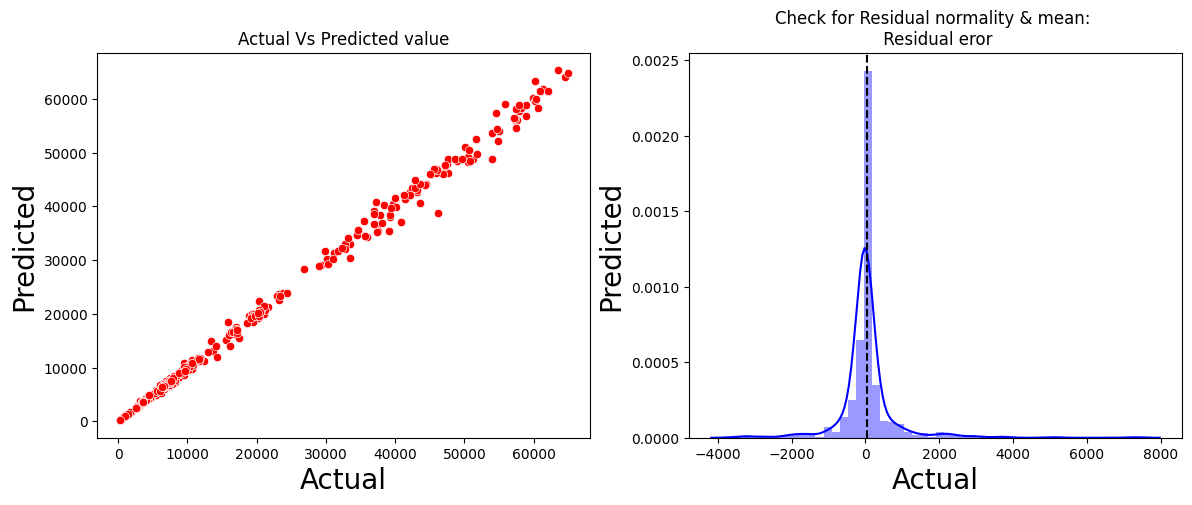

In [743]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)   
sns.scatterplot(x=y_test,y=predictions,ax=ax,color='r')
ax.set_title('Actual Vs Predicted value')
# Check for Residual normality & mean
ax = f.add_subplot(122)
   
sns.distplot((y_test - predictions),ax=ax,color='b')

ax.axvline((y_test - predictions).mean(),color='k',linestyle='--')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)
ax.set_title('Check for Residual normality & mean: \n Residual eror');

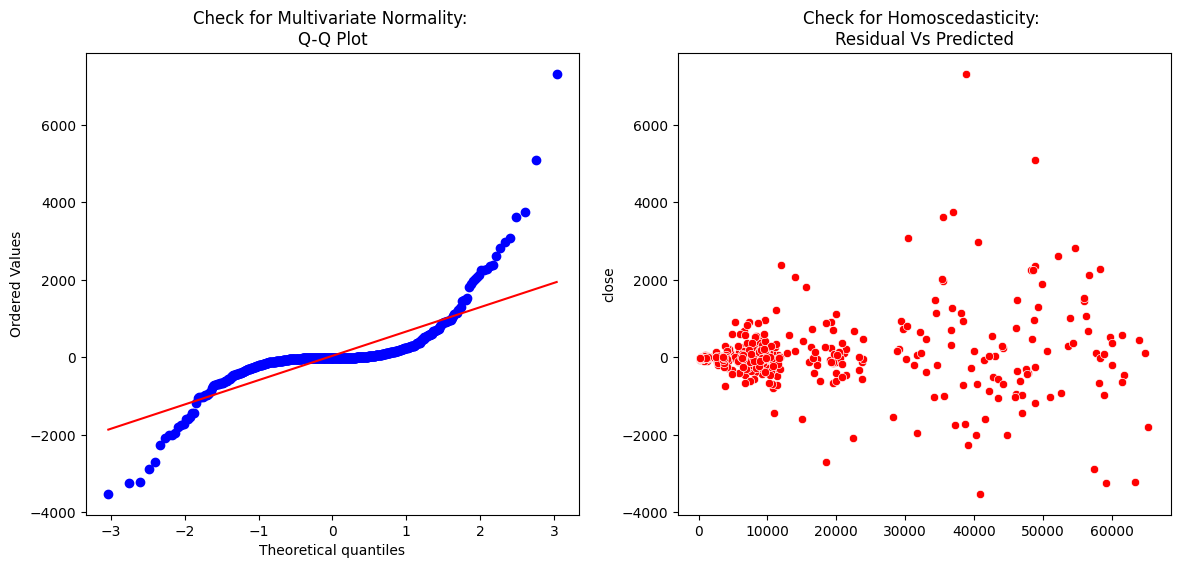

In [744]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - predictions),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - predictions), x= predictions, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');
